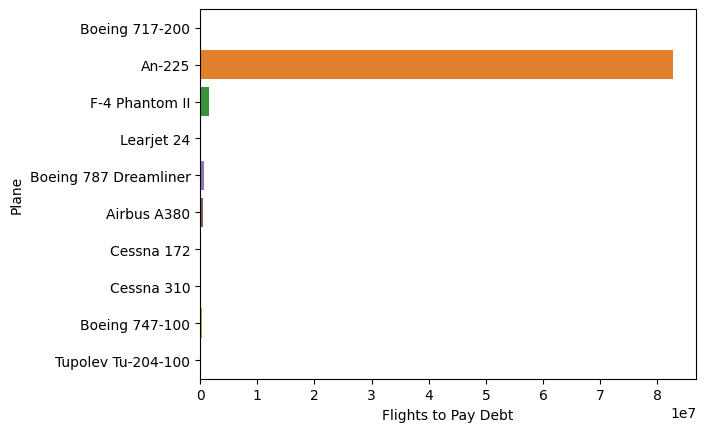

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from pickletools import read_bytes1

fig, axs = plt.subplots()          # Setting up plot

x = 1    #Number of Planes   -   variable
y = 1    #Number of T-Rexes   -   variable

""" 
Physics based graphs and planes not used in final project
Originally set up a physics equation with f(x, y) -> x and y variables for number of planes and number of Rexes
given an x I wanted to find max f(x, y), and what that y value was, so I set up to for loops to cycle through x and y values (1 to 10000)
and find the max profit. Equation seemed to be wrong as max y value for any x value was y = 10000. Also the equation opens upwards.
Spent a lot of time struggling to make this work, but ultimately didn't owrk - ended up not doing a multiplane section

r = 3.35    #Radius of Plane Fuselage
wingspan = 28.45    #Wingspan
wF = 3.34   #Width of Fuselage
aF = np.pi*(r**2)   #Cross-Sectional Area of Fuselage
aW = 1*(wingspan-wF)    #Cross-Sectional Area of Wing

mP = 44500    #Mass of a Plane
mT = 5000    #Mass of a T-Rex
cdP = 0.0075    #Coefficient of Drag for the Plane
cdT = 0.7    #Coefficient of Drag for the T-Rex
aP = aF + aW    #Cross-Sectional Area of a Plane
aT = 1.2    #Cross-Sectional Area of a T-Rex

m = (x*mP) + (y*mT) #Total mass of planes and T-Rexes

g = 9.81    #Acceleration due to Gravity
p = 0.99    #Density of Air
fP = 95.3 * (10**3)    #Force generated by one plane
theta = math.radians(15)    #Angle Plane Travels at
d = 5570.5  #Distance of Flight
cPPPH = 10000  #Cost Per Plane Per Hour of Flight
cTicket = 100    #Cost of One Ticket

a = 2* ( (m*g) - (fP*x*math.sqrt(2)*math.sin(theta)) )
b = p* math.sqrt(2)* math.sin(theta)* ((x*cdP*aP) + (y*cdT*aT))
speed = math.sqrt(a/b)  #Speed equation

#print(d +", " + cPPPH + ", " + x + ", " + speed)
#print("%f, %f, %f, %f" % (d, cPPPH, x, speed))
#print(d), print(cPPPH)

profitComplex = (d*cPPPH*x) / speed    #Total Cost equation

max = 0
xMax = 0
yMax = 0

for x in range(1,10000):
    for y in range(1,10000):
        m = (x*mP) + (y*mT) #Total mass of planes and T-Rexes
        a = 2* ( (m*g) - (fP*x*math.sqrt(2)*math.sin(theta)) )
        b = p* math.sqrt(2)* math.sin(theta)* ((x*cdP*aP) + (y*cdT*aT))
        speed = math.sqrt(a/b)  #Speed equation

        cTotal = (d*cPPPH*x) / speed    #Total Cost equation
        if(cTotal > max):
            max = cTotal
            xMax = x
            yMax = y
        print((x*10000)+y)
print("(" + str(x) + ", " + str(y) + ")" + ", " + str(max))

#costInput = d*x*cPPPH / speed
#y = x*mC / mT
#profitBasic.append((y*cTicket) - costInput)
"""

PLANE_PATH = "../datasets/PlaneData.csv"
planes = pd.read_csv(PLANE_PATH)

mT = 5000    #Mass of a T-Rex

cTicket = 500    #Cost of One Ticket
d = 5570.5      #Distance of Flight
scale = 496    #Scale for Gigaplane (Human size *scale = Rex size)

cPPPH = 0  #Cost Per Plane Per Hour of Flight
mP = 0    #Mass of a Plane
mTOW = 0    #Mass of Take Off Weight
mC = 0      #Mass of max Payload for Plane or 'Cargo'
speed = 0   #Cruise speed of Plane

#costInput = d*x*cPPPH / speed
#y = x*mC / mT
profitBasic = []#(y*cTicket) - costInput
FullCostScaled = []
FlightDebtCount = []
FlightIncome = []
FlightTime = []
DebtYears = []

with open(PLANE_PATH, "r") as f:
    reader = csv.DictReader(f)

    headers = reader.fieldnames

    for rows in reader:
        
        mC = int(rows["PayloadWeight"])      #Mass of max Payload for Plane or 'Cargo'
        mTOW = int(rows["TOW"])    #Mass of Take Off Weight
        mP = int(rows["PlaneWeight"])    #Mass of a Plane
        cPH = int(rows["CostPerHour"])  #Cost Per Plane Per Hour of Flight
        speed = int(rows["CruiseSpeed (kph)"])   #Cruise speed of Plane
        seats =	int(rows["Seats"])     #Number of seats on Plane
        cP = int(rows["FullCost"])       #Cost of one Plane
        #mCScaled = mC *scale    #Scaled payload for Gigaplane
        cPPScaled = cP *scale   #Scaled cost for Gigaplane
        FullCostScaled.append(cPPScaled)
        FlightDebtCount.append(cPPScaled/(seats*cTicket))
        FlightIncome.append(seats*cTicket)
        FlightTime.append(d/speed)
        DebtYears.append((cPPScaled/(seats*cTicket))/(24/(d/speed))/365)
        #print(cPPScaled/(seats*cTicket))

planes["FullCost Scaled"] = FullCostScaled
planes["Flights to Pay Debt"] = FlightDebtCount
planes["Revenue per Flight"] = FlightIncome
planes["Time per Flight (hrs)"] = FlightTime
planes["Number of Years in Debt"] = DebtYears
sns.barplot(data=planes, y="Plane", x="Flights to Pay Debt", orient="h")
plt.savefig('./img/1PlaneFlightDebtCount.png')

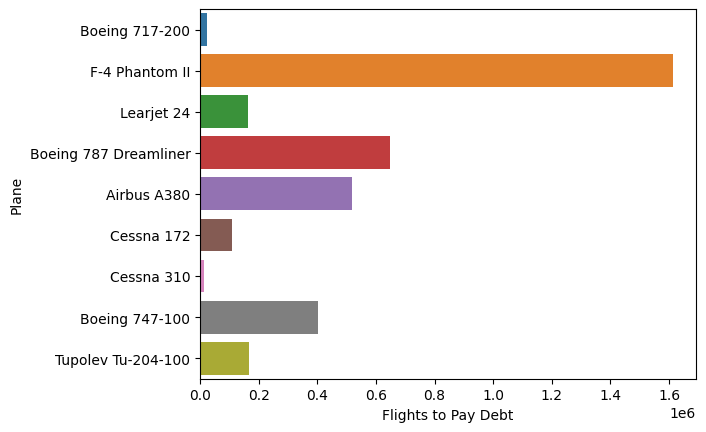

In [2]:
sns.barplot(data=planes[planes["Plane"] != "An-225"], y="Plane", x="Flights to Pay Debt", orient="h")
plt.savefig('./img/2PlaneFlightDebtCountZoom1.png')

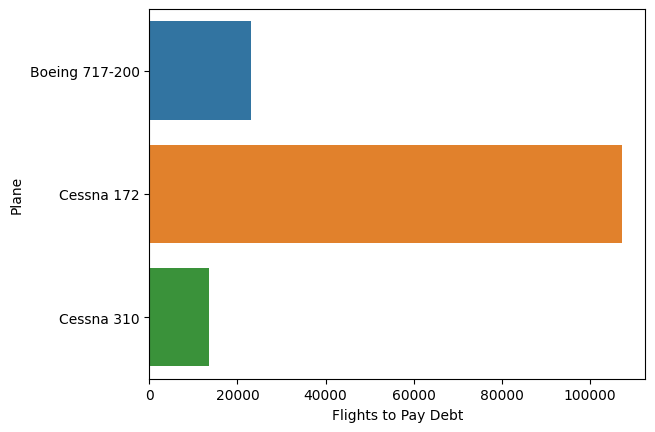

In [3]:
sns.barplot(data=planes[(planes["Plane"] == "Cessna 310") | (planes["Plane"] == "Cessna 172") | (planes["Plane"] == "Boeing 717-200")], y="Plane", x="Flights to Pay Debt", orient="h")
plt.savefig('./img/3PlaneFlightDebtCountZoom2.png')

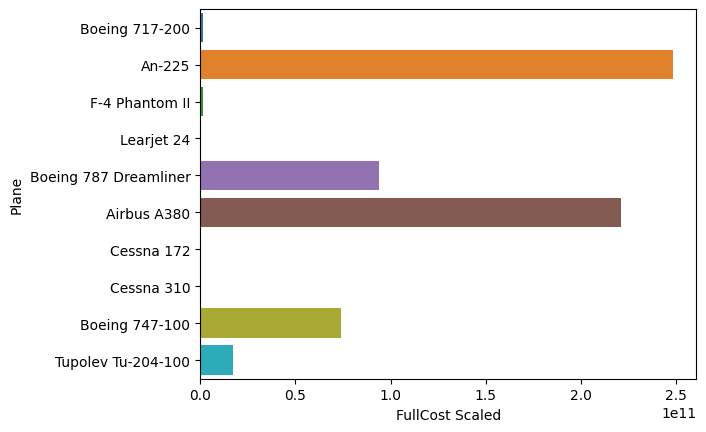

In [4]:
sns.barplot(data=planes, y="Plane", x="FullCost Scaled", orient="h")
plt.savefig('./img/4PlaneCost.png')

/var/folders/sn/7q745v6j3lx1xr88kspsq9500000gr/T/ipykernel_44793/3755249376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(data=planes[planes["Plane"] != "An-225"][planes["Plane"] != "Airbus A380"][planes["Plane"] != "Boeing 787 Dreamliner"][planes["Plane"] != "Boeing 747-100"][planes["Plane"] != "Tupolev Tu-204-100"], y="Plane", x="FullCost Scaled", orient="h")


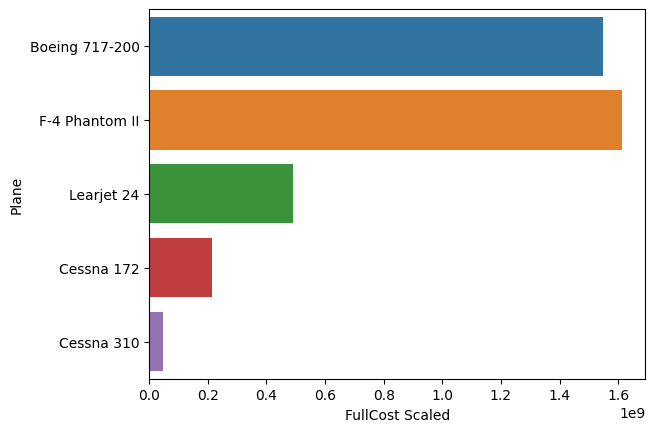

In [5]:
sns.barplot(data=planes[planes["Plane"] != "An-225"][planes["Plane"] != "Airbus A380"][planes["Plane"] != "Boeing 787 Dreamliner"][planes["Plane"] != "Boeing 747-100"][planes["Plane"] != "Tupolev Tu-204-100"], y="Plane", x="FullCost Scaled", orient="h")
plt.savefig('./img/5PlaneCostZoom1.png')

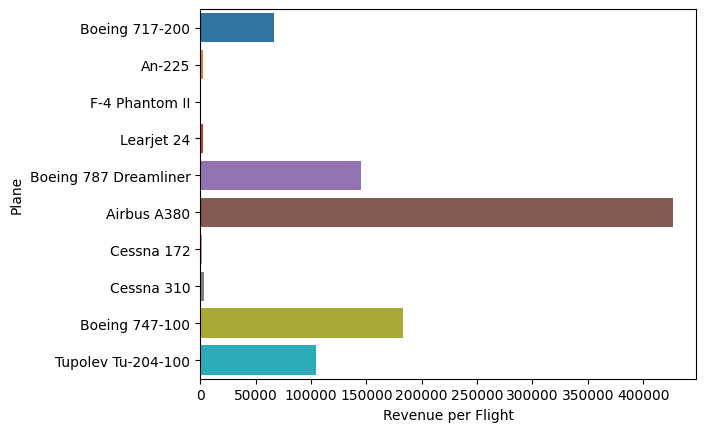

In [6]:
sns.barplot(data=planes, y="Plane", x="Revenue per Flight", orient="h")
plt.savefig('./img/6PlaneFlightRevenue.png')

/var/folders/sn/7q745v6j3lx1xr88kspsq9500000gr/T/ipykernel_44793/4058574633.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(data=planes[planes["Plane"] != "An-225"][planes["Plane"] != "Airbus A380"][planes["Plane"] != "Boeing 787 Dreamliner"][planes["Plane"] != "Boeing 747-100"][planes["Plane"] != "Tupolev Tu-204-100"], y="Plane", x="Revenue per Flight", orient="h")


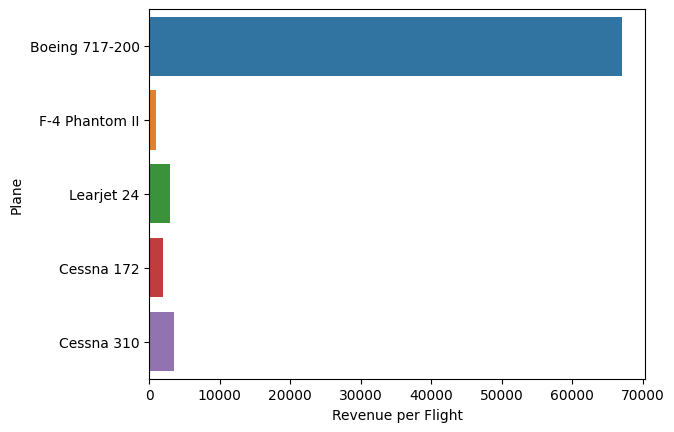

In [7]:
sns.barplot(data=planes[planes["Plane"] != "An-225"][planes["Plane"] != "Airbus A380"][planes["Plane"] != "Boeing 787 Dreamliner"][planes["Plane"] != "Boeing 747-100"][planes["Plane"] != "Tupolev Tu-204-100"], y="Plane", x="Revenue per Flight", orient="h")
plt.savefig('./img/7PlaneFlightRevenueZoom1.png')

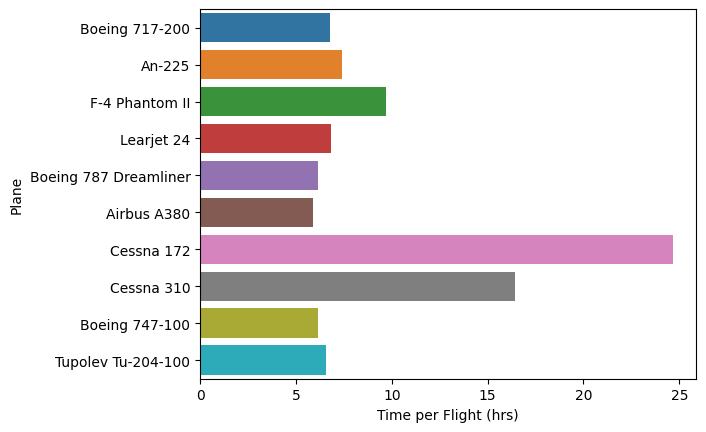

In [8]:
sns.barplot(data=planes, y="Plane", x="Time per Flight (hrs)", orient="h")
plt.savefig('./img/8TimePerFlight.png')

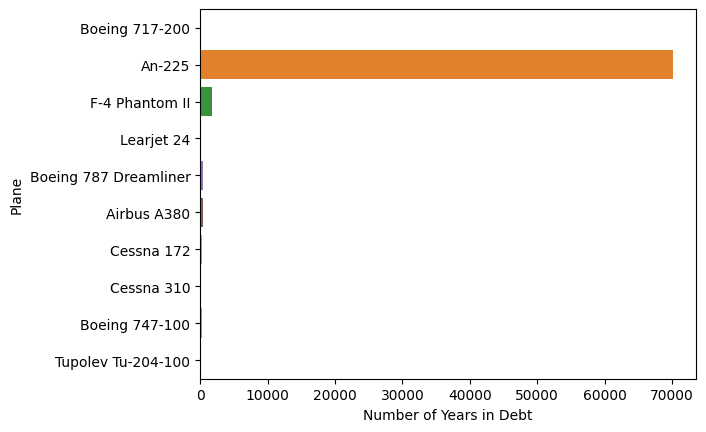

In [9]:
sns.barplot(data=planes, y="Plane", x="Number of Years in Debt", orient="h")
plt.savefig('./img/9YearsDebt.png')

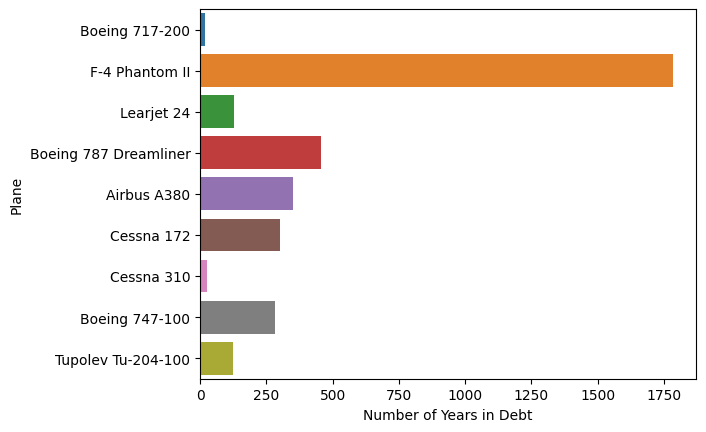

In [10]:
sns.barplot(data=planes[planes["Plane"]!="An-225"], y="Plane", x="Number of Years in Debt", orient="h")
plt.savefig('./img/10YearsDebtZoom1.png')

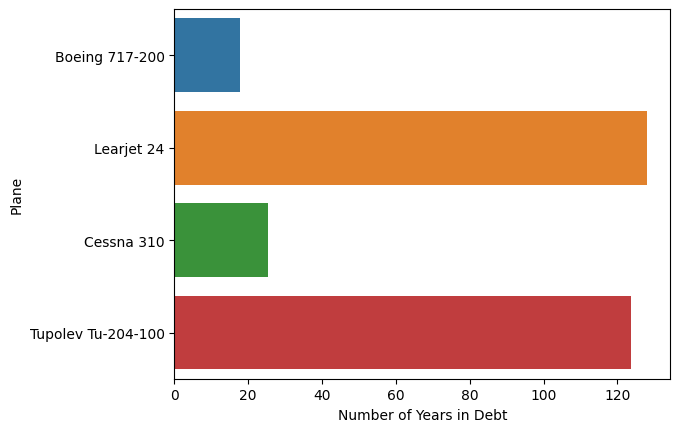

In [11]:
sns.barplot(data=planes[(planes["Plane"] == "Cessna 310") | (planes["Plane"] == "Tupolev Tu-204-100") | (planes["Plane"] == "Boeing 717-200") | (planes["Plane"] == "Learjet 24")], y="Plane", x="Number of Years in Debt", orient="h")
plt.savefig('./img/11YearsDebtZoom2.png')

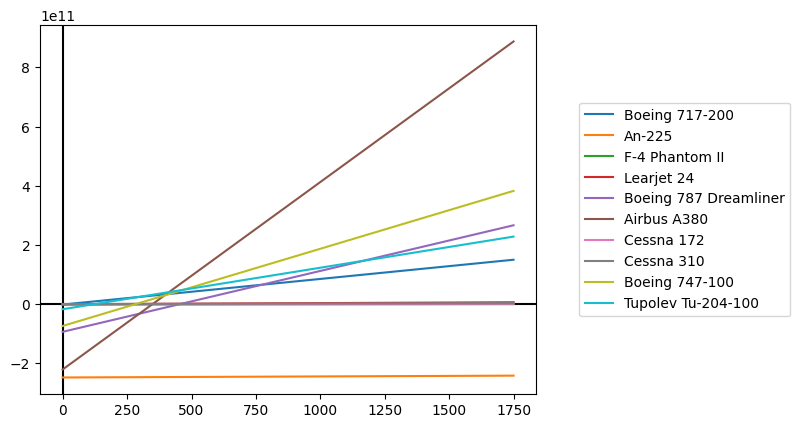

<Figure size 640x480 with 0 Axes>

In [12]:
t = np.arange(1750)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes.iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/12Profit.png')

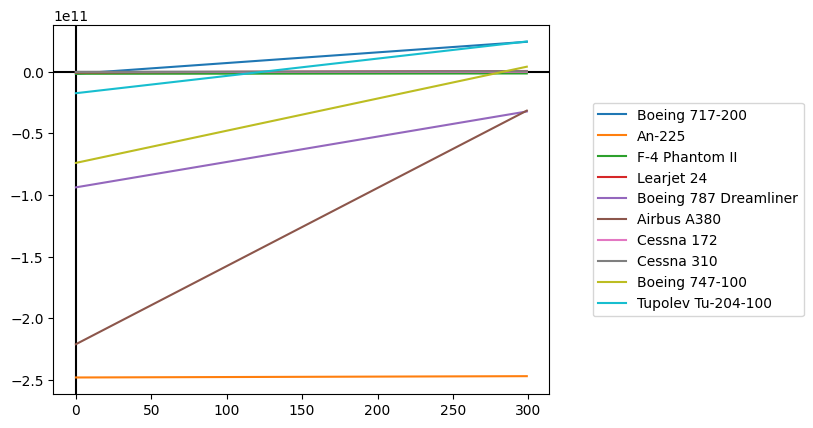

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure()
t = np.arange(300)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes.iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/13ProfitZoom1.png')

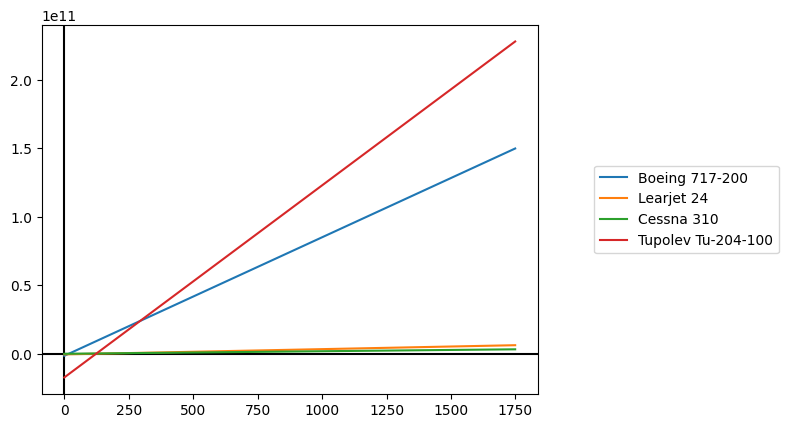

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure()
t = np.arange(1750)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes[(planes["Plane"] == "Cessna 310") | (planes["Plane"] == "Tupolev Tu-204-100") | (planes["Plane"] == "Boeing 717-200") | (planes["Plane"] == "Learjet 24")].iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/14ProfitLimited.png')

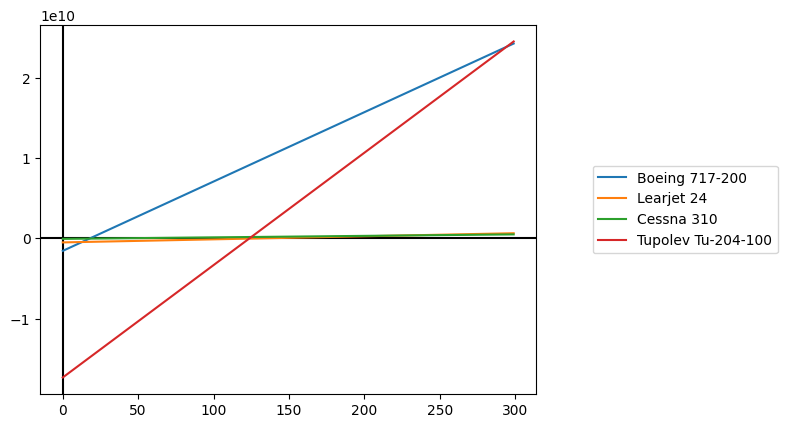

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure()
t = np.arange(300)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes[(planes["Plane"] == "Cessna 310") | (planes["Plane"] == "Tupolev Tu-204-100") | (planes["Plane"] == "Boeing 717-200") | (planes["Plane"] == "Learjet 24")].iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/15ProfitLimitedZoom1.png')

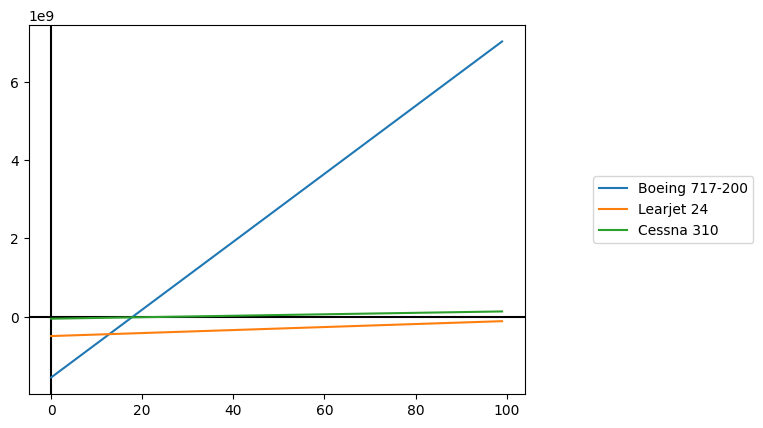

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure()
t = np.arange(100)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes[(planes["Plane"] == "Cessna 310") | (planes["Plane"] == "Boeing 717-200") | (planes["Plane"] == "Learjet 24")].iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/16ProfitLimitedZoom2.png')

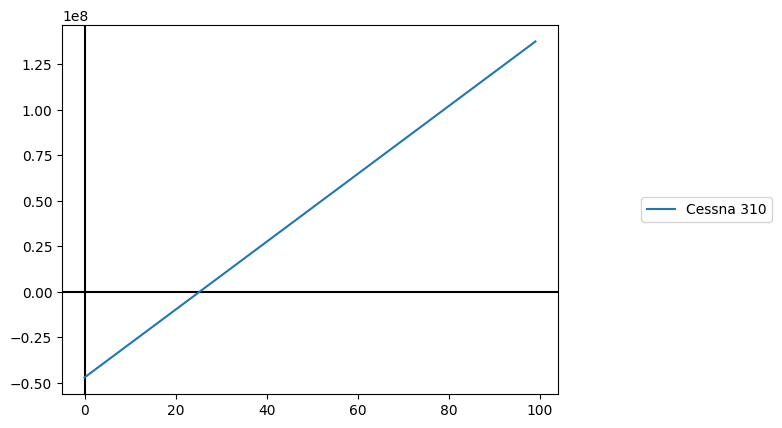

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure()
t = np.arange(100)      #time in years

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for index, row in planes[(planes["Plane"] == "Cessna 310")].iterrows():
    plt.plot(t, (((row["Revenue per Flight"])/((d/row["CruiseSpeed (kph)"])/(24*365)))*(t) - row["FullCost Scaled"]), label=row["Plane"])
plt.legend(loc=10, bbox_to_anchor=(1.3, 0.5))
plt.show()
plt.savefig('./img/17ProfitLimitedZoom3.png')